## To do:
- Create function to tell us what our return will be utilizing this strategy 
    - Also, the return using this strategy compared to if we just held the stock.
- See if we can apply this strategy to multiple stocks at once, and compare which stocks did the best?

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
%matplotlib inline
plt.style.use('fivethirtyeight')

In [4]:
fb = pd.read_csv("ticker-fb.csv", index_col=0, parse_dates=True)

### Data ranges from 01-01-2018 to 12-31-2020

In [7]:
fb.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,181.580002,177.550003,177.679993,181.419998,18151900,181.419998
2018-01-03,184.779999,181.330002,181.880005,184.669998,16886600,184.669998
2018-01-04,186.210007,184.100006,184.899994,184.330002,13880900,184.330002
2018-01-05,186.899994,184.929993,185.589996,186.850006,13574500,186.850006
2018-01-08,188.899994,186.330002,187.199997,188.279999,17994700,188.279999


### Visualize the 'Adj Close' via plt, from 2018 to 2020

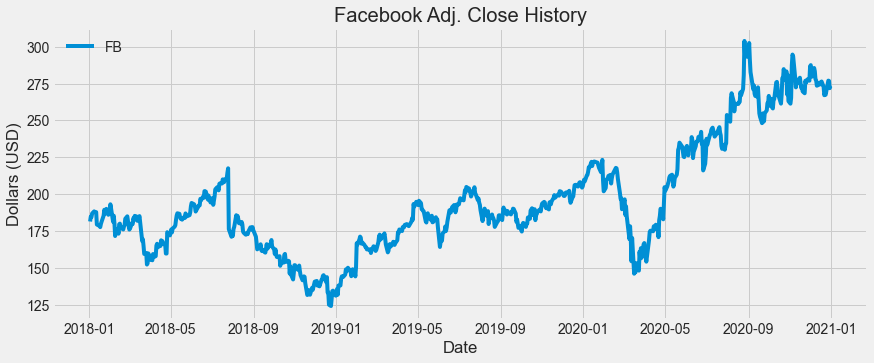

In [20]:
plt.figure(figsize = (13, 5))
plt.plot(fb['Adj Close'], label = 'FB')
plt.title('Facebook Adj. Close History')
plt.xlabel('Date')
plt.ylabel('Dollars (USD)')
plt.legend(loc = 'upper left')

### Create the short (30 days) and long-term (100 days) moving averages of Adj Close prices

In [22]:
fb['SMA30'] = fb['Adj Close'].rolling(30).mean()
fb['SMA100'] = fb['Adj Close'].rolling(100).mean()

In [24]:
fb.head()

,High,Low,Open,Close,Volume,Adj Close,SMA30,SMA100
Date,,,,,,,,
2018-01-02,181.580002,177.550003,177.679993,181.419998,18151900,181.419998,NaN,NaN
2018-01-03,184.779999,181.330002,181.880005,184.669998,16886600,184.669998,NaN,NaN
2018-01-04,186.210007,184.100006,184.899994,184.330002,13880900,184.330002,NaN,NaN
2018-01-05,186.899994,184.929993,185.589996,186.850006,13574500,186.850006,NaN,NaN
2018-01-08,188.899994,186.330002,187.199997,188.279999,17994700,188.279999,NaN,NaN


### We now visualize the SMA's and the Adj Close price together

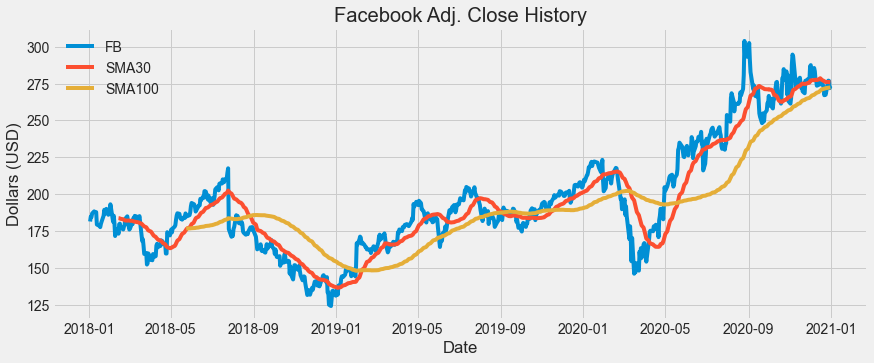

In [21]:
plt.figure(figsize = (13, 5))
plt.plot(fb['Adj Close'], label = 'FB')
plt.plot(fb['SMA30'], label = 'SMA30')
plt.plot(fb['SMA100'], label = 'SMA100')
plt.title('Facebook Adj. Close History')
plt.xlabel('Date')
plt.ylabel('Dollars (USD)')
plt.legend(loc = 'upper left')

### We will now create a DataFrame to store all the relevent data 

In [25]:
data = pd.DataFrame()
data['FB'] = fb['Adj Close']
data['SMA30'] = fb['SMA30']
data['SMA100'] = fb['SMA100']

In [26]:
data.tail()

,FB,SMA30,SMA100
Date,,,
2020-12-24,267.399994,276.039666,271.8648
2020-12-28,277.000000,276.103666,272.1436
2020-12-29,276.779999,276.097999,272.2586
2020-12-30,271.869995,275.861666,272.2929
2020-12-31,273.160004,275.800333,272.3945


### Create a function to signal when to buy and sell the stock(s)

In [38]:
def buy_sell(data):
    sigPriceBuy = [] # An empty list
    sigPriceSell = [] # An empty list
    flag = -1 # Tells us when the two SMA's cross
    
    for i in range(len(data)):
        if data['SMA30'][i] > data['SMA100'][i]: # if this, we need to check the flag
            if flag != 1: # then we have not been here (the flag is -1)
                sigPriceBuy.append(data['FB'][i]) # so I want to get/append the price
                sigPriceSell.append(np.nan) # There is nothing available for the signal price to sell, so input a nan value
                flag = 1 # This is a signal we have been here.
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['SMA30'][i] < data['SMA100'][i]:
            if flag != 0:                    # We are checking to see if we have been here already?
                sigPriceBuy.append(np.nan) # We are appending nothing to the Buy signal, because this flag is telling us to Sell
                sigPriceSell.append(data['FB'][i]) # We need to get/append this price because we are Selling now
                flag = 0
            else: # We are not appending anything
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:    # We are not appending anything, because there is no cross over in this scenario
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
            
    return (sigPriceBuy, sigPriceSell)

### Store the buy and sell data in a variable

In [39]:
buy_sell = buy_sell(data) # Creating a buy_sell variable
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

In [40]:
data.head()

,FB,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,
2018-01-02,181.419998,NaN,NaN,NaN,NaN
2018-01-03,184.669998,NaN,NaN,NaN,NaN
2018-01-04,184.330002,NaN,NaN,NaN,NaN
2018-01-05,186.850006,NaN,NaN,NaN,NaN
2018-01-08,188.279999,NaN,NaN,NaN,NaN


### Visualize the data, and workings of SMA strategy

<Figure size 936x360 with 0 Axes>

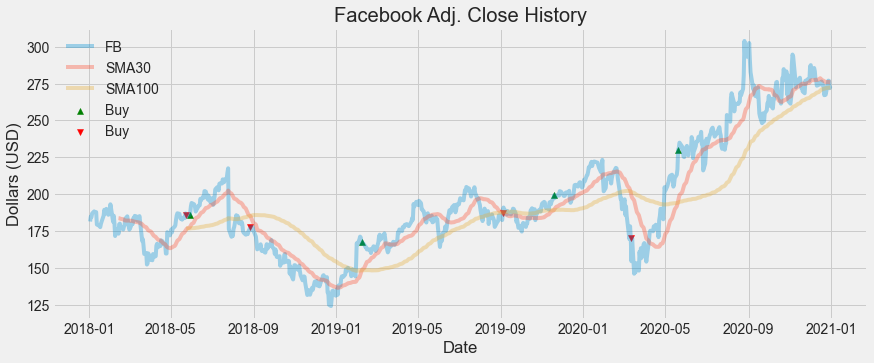

In [41]:
plt.figure(figsize = (13, 5))
plt.figure(figsize = (13, 5))
plt.plot(data['FB'], label = 'FB', alpha = 0.35)
plt.plot(data['SMA30'], label = 'SMA30', alpha = 0.35)
plt.plot(data['SMA100'], label = 'SMA100', alpha = 0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Buy', marker = 'v', color = 'red')
plt.title('Facebook Adj. Close History')
plt.xlabel('Date')
plt.ylabel('Dollars (USD)')
plt.legend(loc = 'upper left')